<a href="https://colab.research.google.com/github/st2-0-3-1-0-2-8-4/CMP7005_S2_PRAC1/blob/main/CMP7005_S2_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Import the necessary Libraries:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Mounting the google drive to the colab environment:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CMP7005/Semester 2/Week5/week5'

/content/drive/MyDrive/CMP7005/Semester 2/Week5/week5


In [ ]:
%ls

 app2.py   app4.py   aqi_data.csv  'week 5 _plotting on streamlit.ipynb'  'Workshop 5_EDA.ipynb'
 app3.py   app.py    city_day.csv  'Week5_workshop 5.ipynb'


### **Loading the Pandas dataframe:**

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### **Exploratory Data Analysis**

In [ ]:
df.shape

(29531, 16)

In [ ]:
#shows columns in list format
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### **Total Number of cities in the dataset**

In [ ]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 26


,count
City,
Ahmedabad,2009
Delhi,2009
Mumbai,2009
Bengaluru,2009
Lucknow,2009
Chennai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
29526,2020-06-27
29527,2020-06-28
29528,2020-06-29
29529,2020-06-30


### **Convert the Date column into Date Time format**

df: This is your DataFrame, which is like a table of data.

df['Date']: This selects the "Date" column from your table.

pd.to_datetime(): This function from the pandas library takes the "Date" values and changes them into a date format that Python can work with more easily.

**So, in summary, this line converts the "Date" column from text (or string) format into an actual date format. This is useful because once the dates are converted, you can do things like sorting the data by date or calculating the time difference between dates.**

In [ ]:
# convert 'Date' to datetime format as in the original dataframe the type of date column is object
df['Date'] = pd.to_datetime(df['Date'])

df['month']=pd.DatetimeIndex(df['Date']).month #making a new column by extracting month part of the Date column in cities dataframe
df['Year']=pd.DatetimeIndex(df['Date']).year ##making a new column by extracting year part of the Date column in cities dataframe


**Checking the new date and month columns and Information of the data types**

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  month       29531 non-

### **Look at the missing values**

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

                0          1
City            0   0.000000
Date            0   0.000000
PM2.5        4598  15.570079
PM10        11140  37.723071
NO           3582  12.129626
NO2          3585  12.139785
NOx          4185  14.171549
NH3         10328  34.973418
CO           2059   6.972334
SO2          3854  13.050692
O3           4022  13.619586
Benzene      5623  19.041008
Toluene      8041  27.229014
Xylene      18109  61.322001
AQI          4681  15.851139
AQI_Bucket   4681  15.851139
month           0   0.000000
Year            0   0.000000


,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI_Bucket,4681,15.851139
AQI,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
df['PM']=df['PM10']+df['PM2.5']
df['Nitric']=df['NO']+df['NO2']+df['NOx']
df['BTX']=df['Benzene']+df['Toluene']+df['Xylene']
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year,PM,Nitric,BTX
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,NaN,NaN,1,2015,NaN,36.29,0.02
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,NaN,NaN,1,2015,NaN,33.12,12.95
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,NaN,NaN,1,2015,NaN,66.40,25.45
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,NaN,NaN,1,2015,NaN,38.15,15.57
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,NaN,NaN,1,2015,NaN,81.28,28.68


## **Creating New DataFrame for Air Quality Index**

In [ ]:
selected_columns = ['City', 'Date', 'month', 'Year','PM2.5', 'PM10', 'Nitric','NH3', 'CO', 'SO2', 'O3', 'BTX', 'AQI', 'AQI_Bucket']

# Create a new DataFrame with only the selected columns
df1 = df[selected_columns]

# Display the first few rows of the new DataFrame
df1.head()


,City,Date,month,Year,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,1,2015,NaN,NaN,36.29,NaN,0.92,27.64,133.36,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,1,2015,NaN,NaN,33.12,NaN,0.97,24.55,34.06,12.95,NaN,NaN
2,Ahmedabad,2015-01-03,1,2015,NaN,NaN,66.40,NaN,17.40,29.07,30.70,25.45,NaN,NaN
3,Ahmedabad,2015-01-04,1,2015,NaN,NaN,38.15,NaN,1.70,18.59,36.08,15.57,NaN,NaN
4,Ahmedabad,2015-01-05,1,2015,NaN,NaN,81.28,NaN,22.10,39.33,39.31,28.68,NaN,NaN


In [ ]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
BTX,18114,61.338932
PM10,11140,37.723071
NH3,10328,34.973418
Nitric,5593,18.939420
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
O3,4022,13.619586
SO2,3854,13.050692
CO,2059,6.972334


## **Imputing missing values**

### **Mean/Median/Mode Imputation**
* **Mean:** Replace missing values with the mean of the column.

* **Median**: Replace missing values with the median of the column. This is useful if your data has outliers, as the median is less sensitive to them.

* **Mode:** Replace missing values with the mode (most frequent value) of the column. This is often used for categorical variables but can be applied to numerical data as well.

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric','NH3', 'CO', 'SO2', 'O3', 'BTX','AQI']
dff= df1.groupby(['Year','month','City'])[pollutants].mean().reset_index()
dff

,Year,month,City,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
0,2015,1,Ahmedabad,82.682500,NaN,91.401333,NaN,23.097333,43.602903,46.350645,6.971613,350.333333
1,2015,1,Bengaluru,NaN,NaN,52.599677,18.968387,4.619677,17.240968,21.395333,NaN,NaN
2,2015,1,Chennai,NaN,NaN,69.730645,5.176774,1.323226,15.312903,22.733548,NaN,NaN
3,2015,1,Delhi,175.690645,276.97129,115.112258,98.160323,10.269355,5.594194,25.868710,19.909032,342.290323
4,2015,1,Hyderabad,NaN,NaN,70.061786,NaN,0.458571,4.617500,24.795357,11.290714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2020,7,Patna,35.420000,57.82000,133.370000,1.140000,0.820000,3.990000,25.760000,9.370000,98.000000
1001,2020,7,Shillong,16.700000,29.40000,4.710000,2.660000,0.100000,4.290000,17.710000,NaN,24.000000
1002,2020,7,Talcher,24.850000,31.06000,114.180000,1.370000,1.520000,14.420000,14.900000,NaN,101.000000
1003,2020,7,Thiruvananthapuram,2.000000,35.00000,6.560000,5.620000,0.420000,6.150000,22.100000,NaN,41.000000


In [ ]:
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['Nitric']=df1['Nitric'].fillna((df1['Nitric'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['BTX']=df1['BTX'].fillna((df1['BTX'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('moderate')

In [ ]:
df1

,City,Date,month,Year,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,1,2015,48.57,95.68,36.29,15.85,0.92,27.64,133.36,0.02,118.0,moderate
1,Ahmedabad,2015-01-02,1,2015,48.57,95.68,33.12,15.85,0.97,24.55,34.06,12.95,118.0,moderate
2,Ahmedabad,2015-01-03,1,2015,48.57,95.68,66.40,15.85,17.40,29.07,30.70,25.45,118.0,moderate
3,Ahmedabad,2015-01-04,1,2015,48.57,95.68,38.15,15.85,1.70,18.59,36.08,15.57,118.0,moderate
4,Ahmedabad,2015-01-05,1,2015,48.57,95.68,81.28,15.85,22.10,39.33,39.31,28.68,118.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,6,2020,15.02,50.94,52.28,12.47,0.47,8.55,23.30,15.04,41.0,Good
29527,Visakhapatnam,2020-06-28,6,2020,24.38,74.09,46.01,11.99,0.52,12.72,30.14,3.33,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,6,2020,22.91,65.73,51.31,10.71,0.48,8.42,30.96,0.02,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,6,2020,16.64,49.97,52.11,10.03,0.52,9.84,28.30,0.00,54.0,Satisfactory


In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
month,29531.0,6.267143,1.0,3.0,6.0,9.0,12.0,3.431974
Year,29531.0,2017.887914,2015.0,2017.0,2018.0,2019.0,2020.0,1.533783
PM2.5,29531.0,64.510857,0.04,32.15,48.57,72.45,949.99,59.807551
PM10,29531.0,109.659366,0.01,79.315,95.68,111.88,1000.0,72.32402
Nitric,29531.0,75.565432,0.08,41.215,58.81,85.315,797.89,62.052638
NH3,29531.0,20.813789,0.01,12.04,15.85,21.755,352.89,21.028862
CO,29531.0,2.153872,0.0,0.54,0.89,1.38,175.81,6.72466
SO2,29531.0,13.830897,0.01,6.09,9.16,13.81,193.86,17.005647
O3,29531.0,33.994121,0.01,20.74,30.84,42.73,257.73,20.202304


# **Key Insights from the Summary Statistics:**

**Date Range & Trends**
The dataset spans from January 1, 2015, to July 1, 2020.
The median date (~August 5, 2018) suggests that most data points are centered around 2018-2019.

**PM2.5 & PM10 Levels (Air Pollution Indicators)**

**PM2.5 Mean:** 64.51 µg/m³ (with a max of 949.99 µg/m³ → extreme pollution events).

**PM10 Mean:** 109.66 µg/m³ (with a max of 1000 µg/m³ → very high pollution spikes).

High standard deviation (59.8 for PM2.5 and 72.3 for PM10) suggests high variability, indicating fluctuating air quality conditions.

**Other Pollutants**

**Nitric Oxide (NOx):** Mean 75.56, max 797.89 → suggests significant emissions, possibly from vehicles and industry.

**NH3 (Ammonia):** Mean 20.81, but with a max of 352.89, indicating localized spikes (agricultural or industrial activity).

**CO (Carbon Monoxide):** Mean 2.15, max 175.81 → occasional severe air quality concerns.

**SO2 (Sulfur Dioxide):** Mean 13.83, max 193.86, indicating industrial pollution.

**O3 (Ozone):** Mean 33.99, max 257.73, highlighting significant ozone formation, likely due to strong sunlight and high precursor emissions.

**BTX (Benzene, Toluene, Xylene - Industrial Pollutants):** Mean 12.38, but max 403.89, suggesting occasional high exposure to hazardous air toxins.

**Air Quality Index (AQI) Analysis**

Mean AQI: 158.78 (falls in the "Unhealthy for Sensitive Groups" category).
Max AQI: 2049 → Extremely hazardous pollution levels observed at certain times.
High AQI variability (std = 130.27) indicates inconsistent air quality.

**Final Thoughts:**

The data suggests severe air pollution events, with occasional hazardous levels.
High variability across pollutants implies that air quality is affected by multiple factors (seasonal changes, industrial activity, and vehicular emissions).

Further EDA with time-series analysis can help identify pollution trends and their causes.

### **Subsetting columns**
Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called pollutants containg the major pollutants responsible for air pollution.

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric','NH3', 'CO', 'SO2', 'O3', 'BTX','AQI']

In [ ]:
df1.columns

Index(['City', 'Date', 'month', 'Year', 'PM2.5', 'PM10', 'Nitric', 'NH3', 'CO',
       'SO2', 'O3', 'BTX', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.to_csv('/content/drive/MyDrive/CMP7005/AQI_India/aqi_data.csv', index=False)

### **Visualisation of each pollutants (using daily data)**

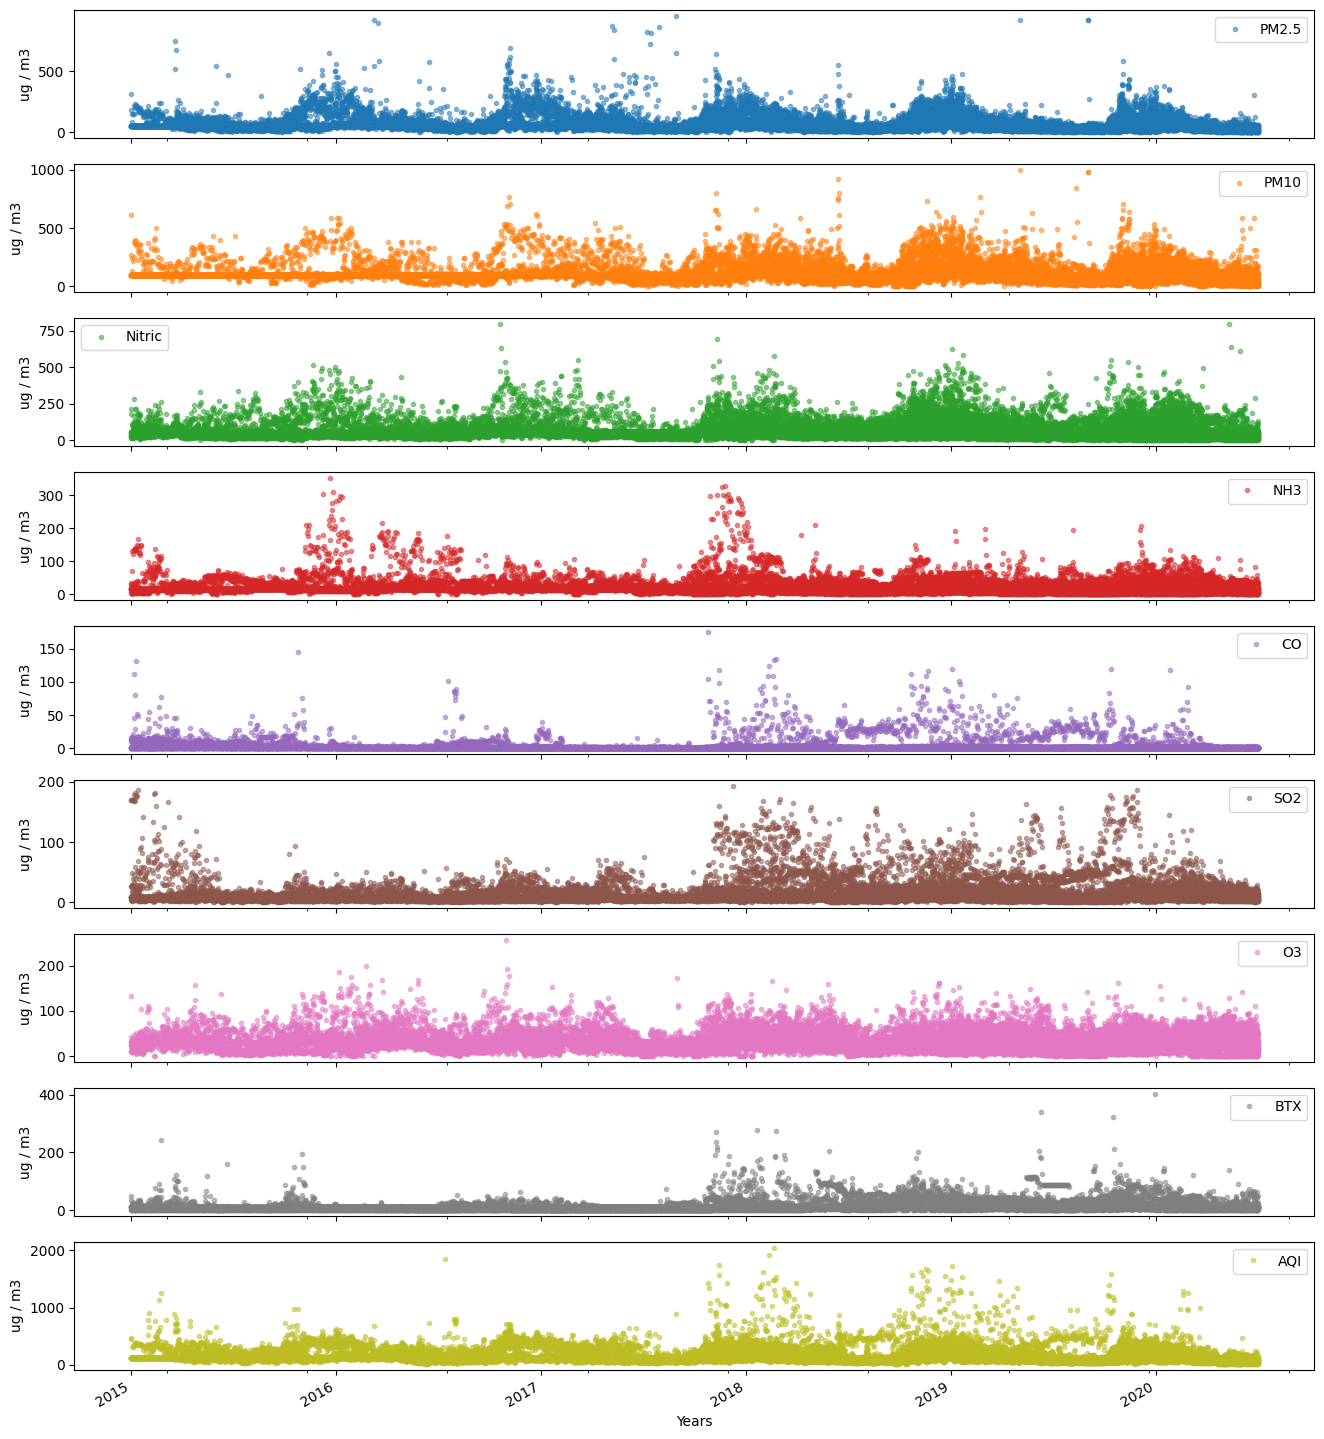

In [ ]:
df1.set_index('Date',inplace=True)
axes = df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
df1

,City,month,Year,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,AQI_Bucket
Date,,,,,,,,,,,,,
2015-01-01,Ahmedabad,1,2015,48.57,95.68,36.29,15.85,0.92,27.64,133.36,0.02,118.0,moderate
2015-01-02,Ahmedabad,1,2015,48.57,95.68,33.12,15.85,0.97,24.55,34.06,12.95,118.0,moderate
2015-01-03,Ahmedabad,1,2015,48.57,95.68,66.40,15.85,17.40,29.07,30.70,25.45,118.0,moderate
2015-01-04,Ahmedabad,1,2015,48.57,95.68,38.15,15.85,1.70,18.59,36.08,15.57,118.0,moderate
2015-01-05,Ahmedabad,1,2015,48.57,95.68,81.28,15.85,22.10,39.33,39.31,28.68,118.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,6,2020,15.02,50.94,52.28,12.47,0.47,8.55,23.30,15.04,41.0,Good
2020-06-28,Visakhapatnam,6,2020,24.38,74.09,46.01,11.99,0.52,12.72,30.14,3.33,70.0,Satisfactory
2020-06-29,Visakhapatnam,6,2020,22.91,65.73,51.31,10.71,0.48,8.42,30.96,0.02,68.0,Satisfactory


### **Monthwise Plot**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX', 'AQI']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
#df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year and month, and calculating mean for each pollutant
df1['Month'] = df1['Date'].dt.to_period('M')
df_monthly = df1.groupby('Month')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),  # Convert PeriodIndex to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df1 and pollutants are already defined
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df1.groupby(['Year', 'month'])[pollutants].mean().reset_index()

# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'month']].assign(DAY=1))

# Create subplots for each pollutant
fig = make_subplots(rows=len(pollutants), cols=1, subplot_titles=[f'{pollutant} Monthly Average Concentration Over Time' for pollutant in pollutants])

# Add traces for each pollutant
for i, pollutant in enumerate(pollutants):
    fig.add_trace(
        go.Scatter(
            x=monthly_avg['Date'],
            y=monthly_avg[pollutant],
            mode='lines+markers',
            name=pollutant,
            line=dict(color='blue', width=2),
            marker=dict(size=8),
            opacity=0.7
        ),
        row=i+1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Monthly Average Concentrations of Pollutants Over Time',
    title_font_size=24,
    showlegend=False,
    height=300 * len(pollutants),  # Adjust height based on the number of pollutants
    width=1000
)

# Update y-axis labels
for i, pollutant in enumerate(pollutants):
    fig.update_yaxes(title_text=f'{pollutant} (ug/m3)', row=i+1, col=1)

# Update x-axis labels
fig.update_xaxes(title_text='Date', row=len(pollutants), col=1)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
monthly_avg

,Year,month,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,Date
0,2015,1,67.622290,121.941822,68.545187,26.679065,7.399486,26.267850,29.469953,9.404112,153.747664,2015-01-01
1,2015,2,72.233776,115.574235,69.823418,29.429643,6.997296,20.054898,34.448520,13.475612,199.346939,2015-02-01
2,2015,3,73.978065,101.303502,61.095300,18.542627,6.268341,16.776175,38.082488,13.793687,190.230415,2015-03-01
3,2015,4,64.247667,108.867333,60.010286,18.703810,3.637667,16.713476,38.574381,9.431381,177.733333,2015-04-01
4,2015,5,60.904516,120.732949,65.819724,21.851889,4.204516,14.447235,37.897281,9.460138,182.092166,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,3,41.973141,87.285490,64.217877,20.239472,1.129812,13.173894,34.807927,11.875314,110.737437,2020-03-01
63,2020,4,31.850538,71.502077,48.213936,17.701769,0.751000,10.992487,35.294038,9.416603,89.124359,2020-04-01
64,2020,5,28.510496,71.769318,49.598871,15.176067,0.717221,10.236154,36.374194,10.133610,88.356079,2020-05-01
65,2020,6,26.425833,64.559949,44.495859,14.206756,0.729949,9.945026,31.344064,11.019577,78.571795,2020-06-01


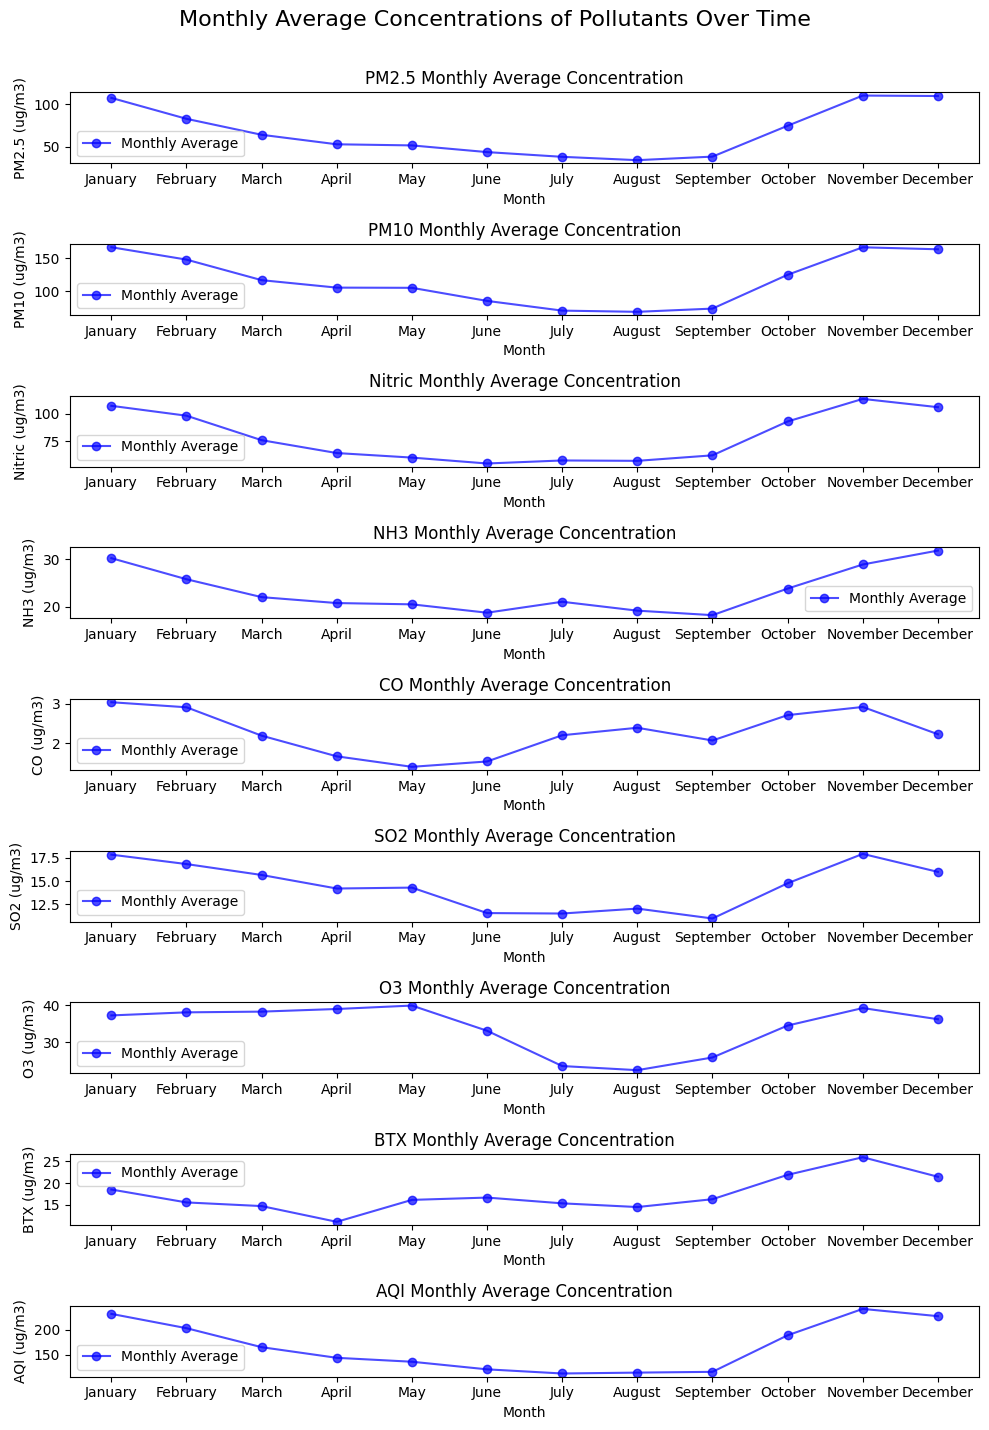

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is in datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX', 'AQI']
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year, and calculating mean for each pollutant
df1['Year'] = df1['Date'].dt.year
df_yearly = df1.groupby('Year')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Yearly Pollutant Levels"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_yearly.index.astype(str),  # Convert Year to string for x-axis
            y=df_yearly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Yearly Pollutant Levels",
    xaxis_title="Year",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


## **Most Dominant Pollutants:**

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
pol=df1[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,PM2.5,64.510857
1,PM10,109.659366
2,Nitric,75.565432
3,NH3,20.813789
4,CO,2.153872
5,SO2,13.830897
6,O3,33.994121
7,BTX,12.382116


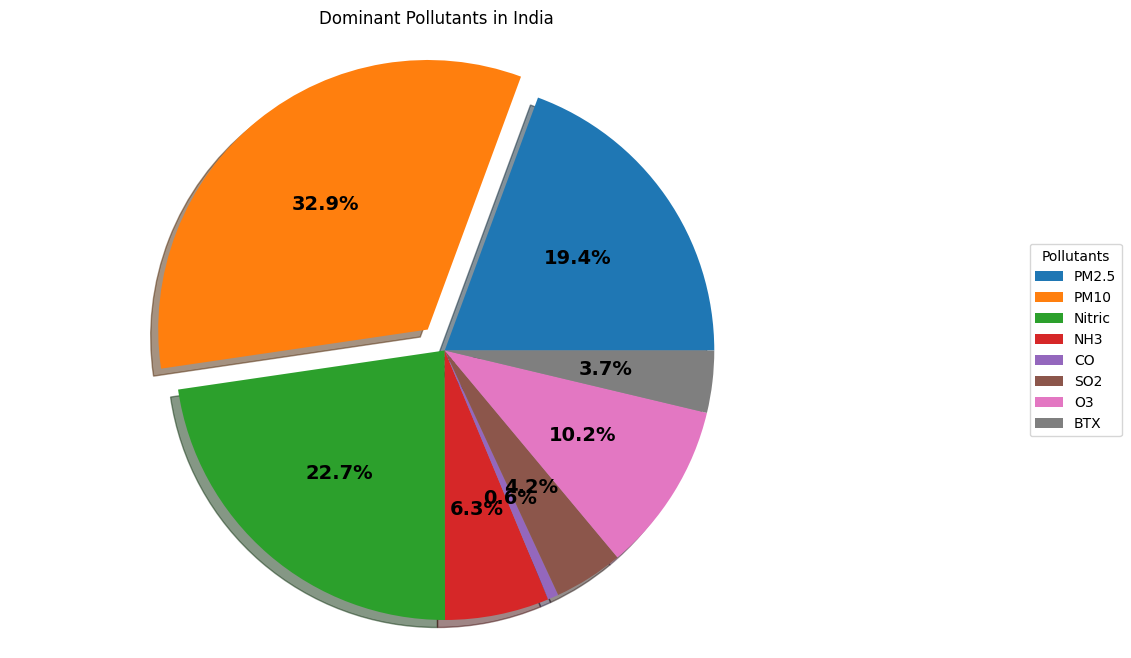

In [ ]:
plt.figure(figsize=(11,8))

labels = pollutants_df['Pollutant']
explode = [0, 0.1, 0, 0, 0, 0, 0,0]  # Exploding the first slice (PM2.5)

plt.title('Dominant Pollutants in India')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

## **Dominant Pollutant citywise**

In [ ]:
import pandas as pd

pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Group data by 'State' and calculate the mean of each pollutant
statewise_pollution_means = df1.groupby('City')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_state = statewise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_state.reset_index()
dominant_pollutant_df.columns = ['City', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df


,City,Dominant Pollutant
0,Ahmedabad,Nitric
1,Aizawl,PM10
2,Amaravati,PM10
3,Amritsar,PM10
4,Bengaluru,PM10
5,Bhopal,PM10
6,Brajrajnagar,PM10
7,Chandigarh,PM10
8,Chennai,PM10
9,Coimbatore,Nitric


## **Correlation between the different Pollutants**

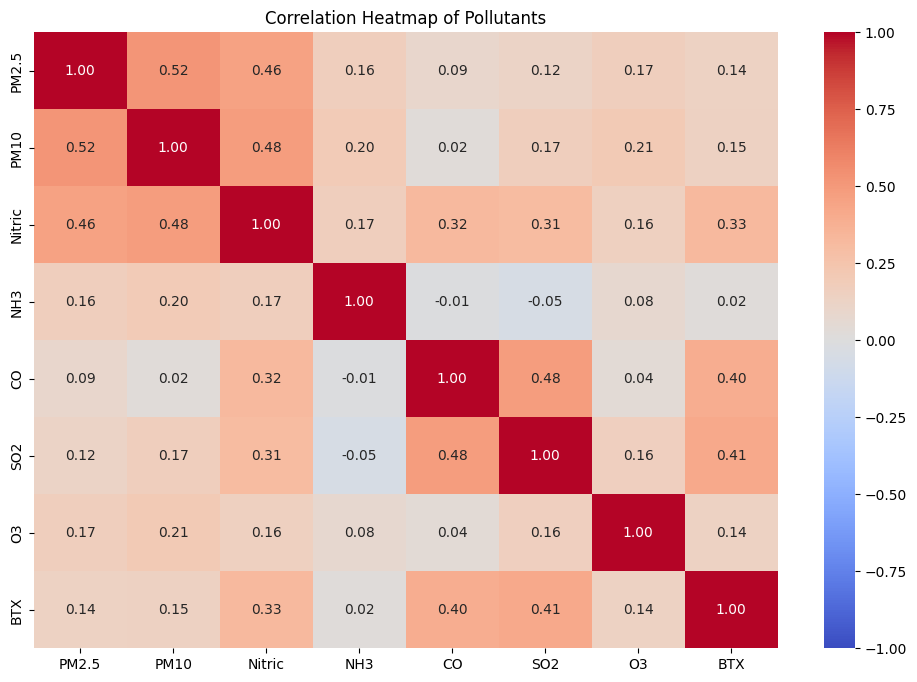

In [ ]:

# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


In [ ]:
numeric_pollutants_df.corr()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()


## **Top 10 polluted Cities (based on Pollutants)**

Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years.

In [ ]:
def max_polluted_city(pollutants):
    x1 = df[[pollutants,'City']].groupby(["City"]).mean().sort_values(by=pollutants,ascending=False).reset_index()
    x1[pollutants] = round(x1[pollutants],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Example usage with your top pollutant DataFrames
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('Nitric')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')
nh3=max_polluted_city('NH3')
ozone=max_polluted_city('O3')
air_qua=max_polluted_city('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no2, so2, co, btx,nh3,ozone,air_qua)


,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,109.710000
4,Ahmedabad,67.850000
5,Kolkata,64.360000
6,Jorapokhar,64.230000
7,Brajrajnagar,64.060000
8,Guwahati,63.690000
9,Talcher,61.410000


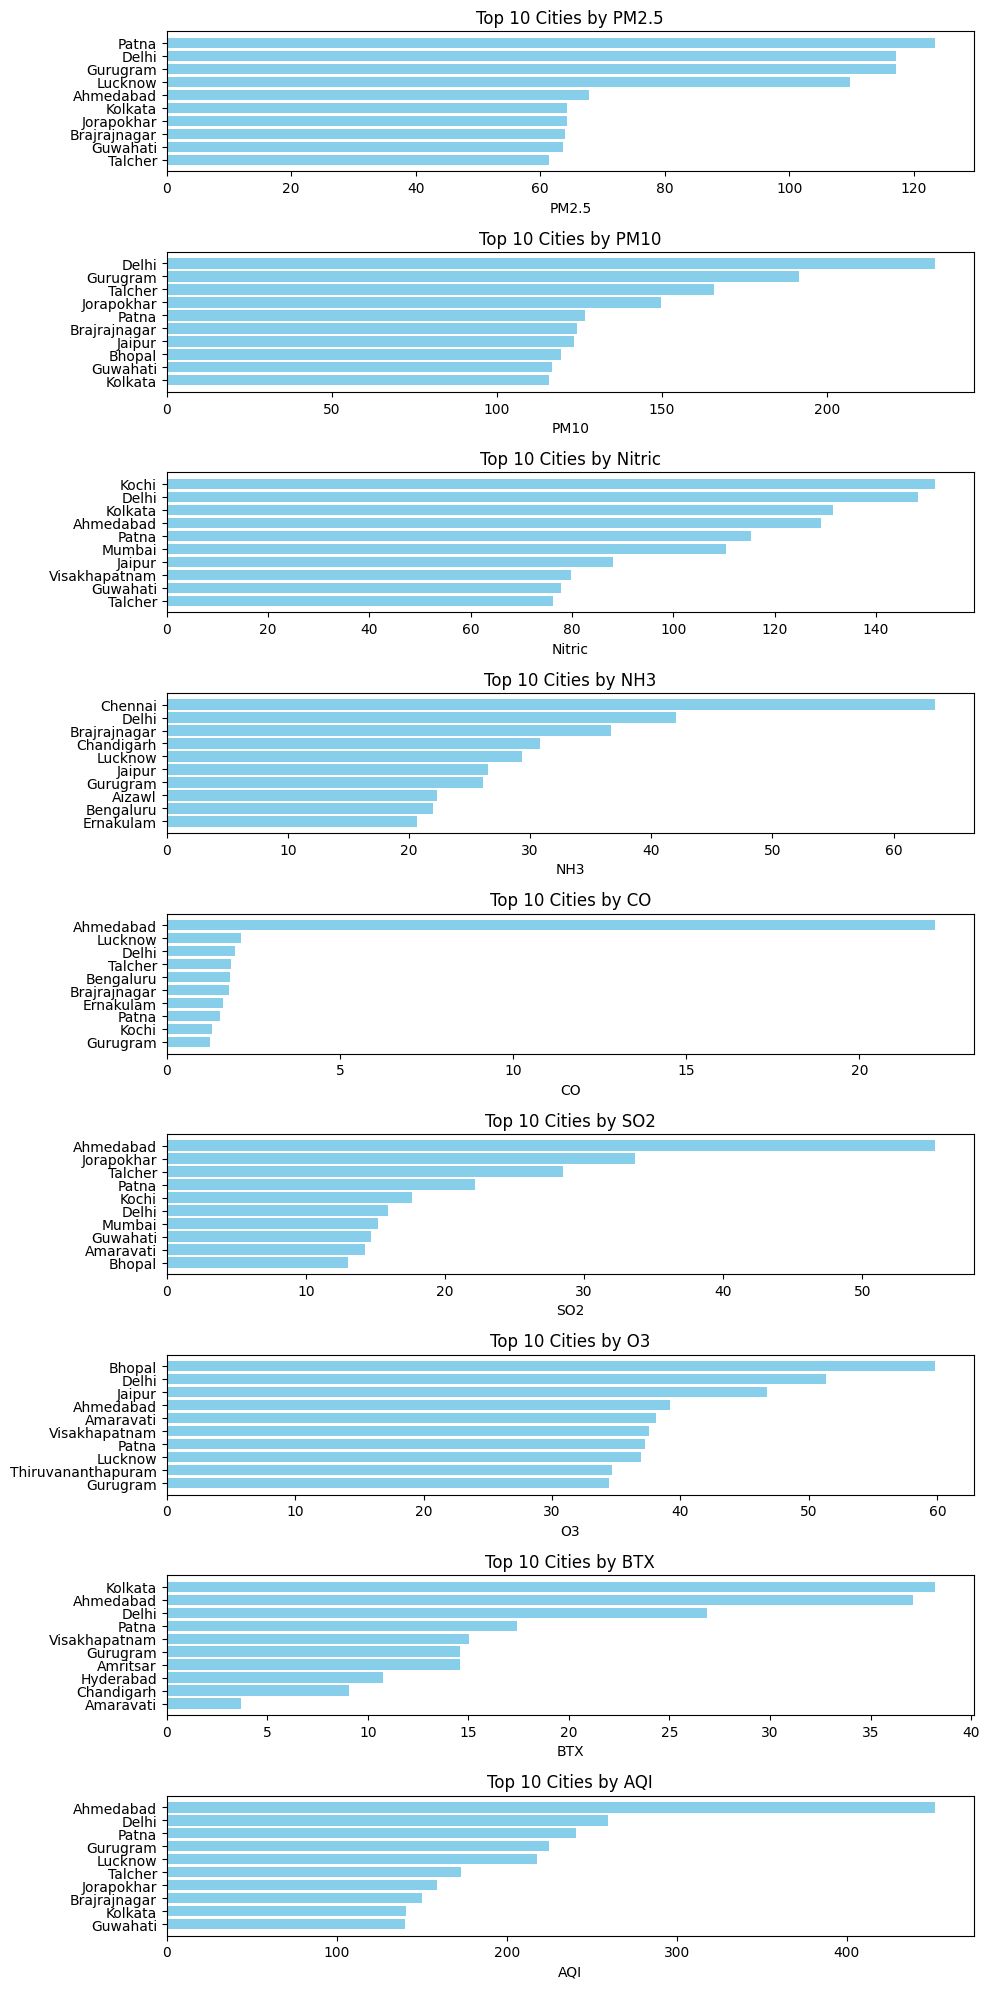

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with pollutant data
pollutant_columns = ['PM2.5','PM10','Nitric', 'NH3','CO', 'SO2','O3', 'BTX','AQI']

# Step 1: Group by city and calculate mean pollutant concentrations
mean_pollutant_by_city = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 10 cities for each pollutant
top_cities = {}
for pollutant in pollutant_columns:
    top_cities[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(10)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_cities[pollutant].index, top_cities[pollutant].values, color='skyblue')
    axes[i].set_title(f'Top 10 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


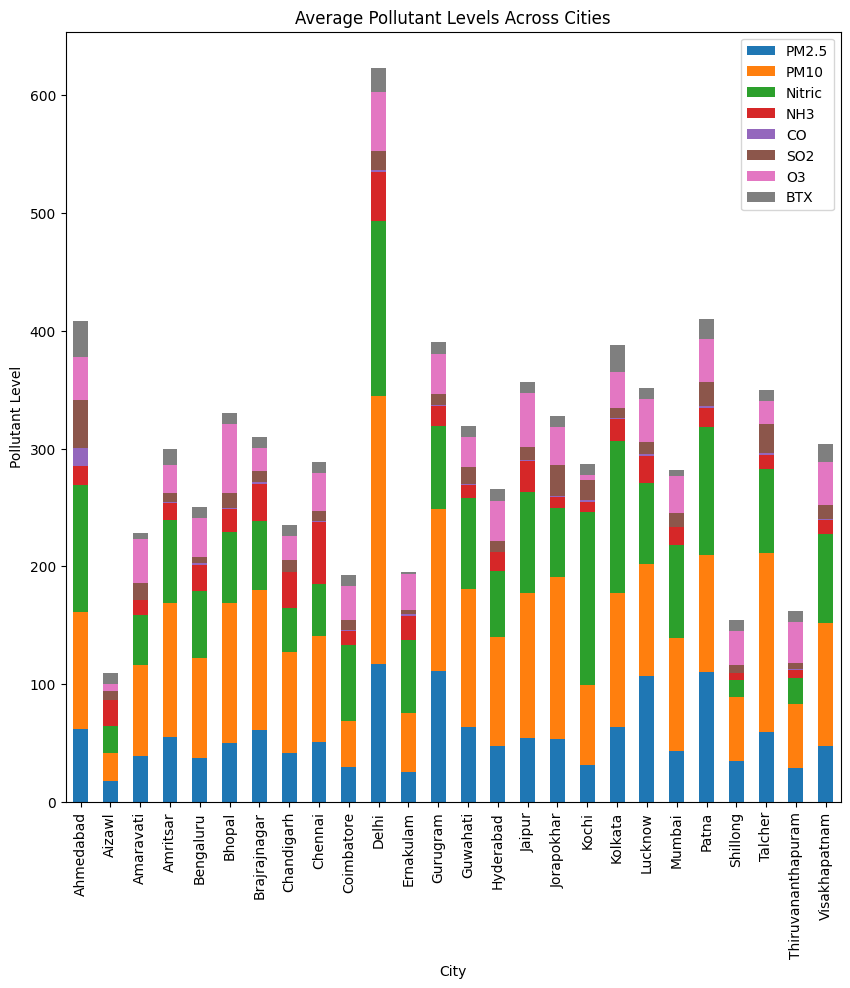

In [ ]:
# Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average levels of pollutants for each city
city_pollution = df1.groupby('City')[pollutants].mean()

import matplotlib.pyplot as plt

# Plotting the average pollutants for each city
city_pollution.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('Average Pollutant Levels Across Cities')
plt.xlabel('City')
plt.ylabel('Pollutant Level')
plt.show()


## **Top 10 polluted Cities (based on AQI values)**

Let's now look at the Indian cities which contribute to maximum pollution using the AQI values. We shall output the top 10 cities in each pollutant category by mean concentration of the AQI values over the years.

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Calculate the average AQI for each city
average_aqi_by_city = df.groupby('City')['AQI'].mean().reset_index()

# Sort the cities by average AQI in descending order to find the most polluted
most_polluted_cities = average_aqi_by_city.sort_values(by='AQI', ascending=False)

# Display the top 10 most polluted cities
top_10_most_polluted_cities = most_polluted_cities.head(25)
print(top_10_most_polluted_cities)


                  City         AQI
0            Ahmedabad  452.122939
10               Delhi  259.487744
21               Patna  240.782042
12            Gurugram  225.123882
19             Lucknow  217.973059
23             Talcher  172.886819
16          Jorapokhar  159.251621
6         Brajrajnagar  150.280505
18             Kolkata  140.566313
13            Guwahati  140.111111
15              Jaipur  133.679159
5               Bhopal  132.827338
3             Amritsar  119.920959
25       Visakhapatnam  117.269855
8              Chennai  114.502654
14           Hyderabad  109.207447
20              Mumbai  105.352258
17               Kochi  104.284810
7           Chandigarh   96.498328
2            Amaravati   95.299643
4            Bengaluru   94.318325
11           Ernakulam   92.359477
24  Thiruvananthapuram   75.878327
9           Coimbatore   73.023256
22            Shillong   53.795122


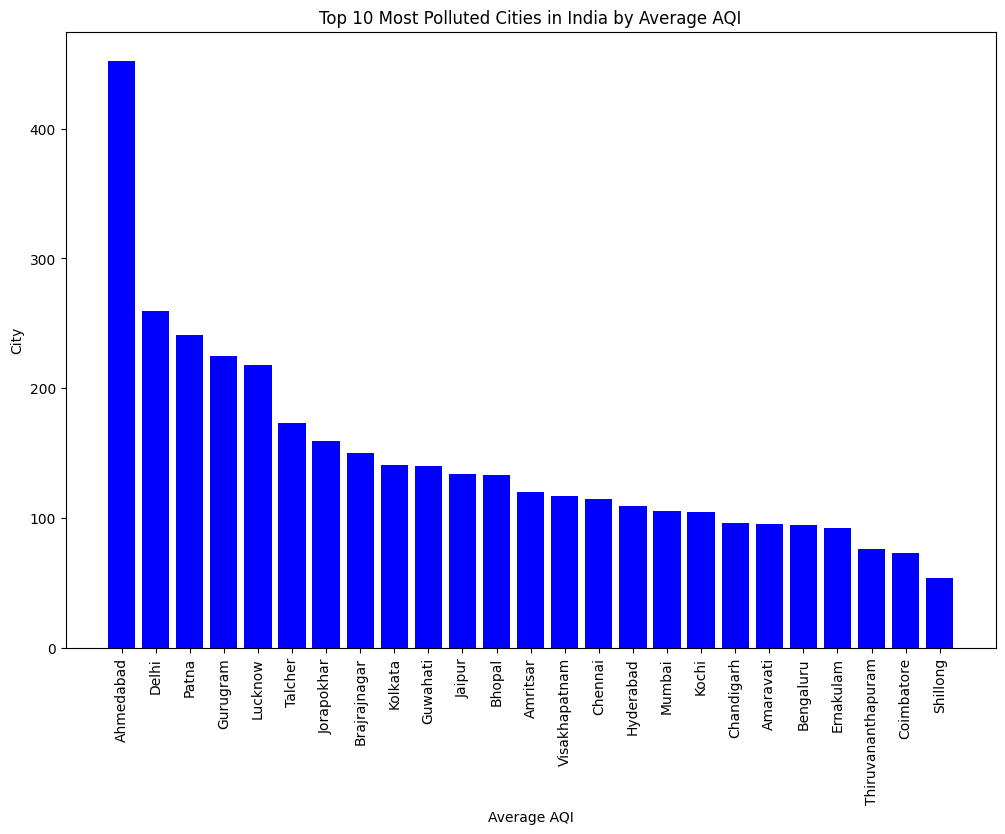

In [ ]:
import matplotlib.pyplot as plt

# Bar chart to show the average AQI of the top 10 most polluted cities
plt.figure(figsize=(12, 8))
plt.bar(top_10_most_polluted_cities['City'], top_10_most_polluted_cities['AQI'], color='blue')
plt.xlabel('Average AQI')
plt.xticks(rotation=90);
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities in India by Average AQI')
plt.show()


### **Observations:**

Here we see that Delhi has the highest AQI value among all the cities for the period of 2015-2020.
The next highest is Patna and the city with lowest AQI is Shillong.

In [ ]:
delhi_df1=df1[df1.City == 'Delhi']
patna_df1=df1[df1.City == 'Patna']
gurugram_df1=df1[df1.City == 'Gurugram']
lucknow_df1=df1[df1.City == 'Lucknow']
talcher_df1=df1[df1.City == 'Talcher']

In [ ]:
delhi_df1

,City,month,Year,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI,AQI_Bucket
Date,,,,,,,,,,,,,
2015-01-01,Delhi,1,2015,313.22,607.98,216.14,33.85,15.20,9.25,41.68,49.06,472.0,Severe
2015-01-02,Delhi,1,2015,186.18,269.55,183.10,31.83,9.54,6.65,29.97,34.93,454.0,Severe
2015-01-03,Delhi,1,2015,87.18,131.90,103.99,69.55,10.61,2.65,19.71,16.13,143.0,Moderate
2015-01-04,Delhi,1,2015,151.84,241.84,110.54,130.36,11.54,4.63,25.36,17.31,319.0,Very Poor
2015-01-05,Delhi,1,2015,146.60,219.13,87.18,122.88,9.20,3.33,23.20,11.97,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Delhi,6,2020,39.80,155.94,54.81,31.43,0.87,10.38,18.88,22.11,112.0,Moderate
2020-06-28,Delhi,6,2020,59.52,308.65,58.13,29.27,0.94,10.70,18.05,28.58,196.0,Moderate
2020-06-29,Delhi,6,2020,44.86,184.12,54.01,27.97,0.88,11.58,26.61,27.06,233.0,Poor


In [ ]:
delhi_df1_yr=delhi_df1.groupby('Year')[selected_columns[4:13]].mean()
delhi_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,117.340822,227.415014,165.132110,47.512356,5.255151,12.606904,57.395507,15.728932,297.024658
2016,138.502842,254.262869,189.816175,42.385273,1.610082,18.792022,76.857869,9.315055,300.868852
2017,124.671425,236.214110,143.056959,44.600000,0.697753,19.390795,39.618712,10.573315,253.306849
2018,115.019397,240.110247,139.677808,42.397123,1.407068,13.642959,44.372438,28.977534,249.158904
2019,108.501479,215.047808,130.597808,36.401205,1.371616,14.031205,38.941014,33.885699,232.104110
2020,80.317978,157.034208,94.734372,34.106776,1.057760,13.912404,40.649891,23.374645,181.672131


In [ ]:
patna_df1_yr=patna_df1.groupby('Year')[selected_columns[4:13]].mean()
patna_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,113.979533,95.680000,131.654112,15.850000,1.789533,6.920514,12.008738,3.775654,206.023364
2016,132.404481,95.680000,108.476038,15.850000,1.672350,6.564863,17.507814,1.797951,239.480874
2017,107.485945,95.680000,113.626849,15.850000,1.159945,11.567041,28.625068,5.155945,200.205479
2018,120.725068,95.680000,87.166877,15.850000,1.529671,37.499041,60.397589,40.376658,232.367123
2019,104.212904,97.908658,89.100164,16.322466,1.556384,41.355068,58.594521,30.801890,216.610959
2020,61.321694,123.660984,158.658033,17.539399,1.133333,8.608634,24.968142,8.943497,162.251366


In [ ]:
gurugram_df1_yr=gurugram_df1.groupby('Year')[selected_columns[4:13]].mean()
gurugram_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,48.570000,95.680000,41.676857,15.850000,1.426286,7.639143,17.352857,9.280000,118.000000
2016,106.540765,95.680000,49.883716,15.850000,1.334536,7.215628,28.303443,9.280000,188.396175
2017,157.188822,96.501151,57.017863,15.850000,1.833918,8.518164,31.766521,9.280000,268.260274
2018,113.599671,183.366384,100.580493,15.850000,0.897205,8.183562,31.784849,9.280000,226.197260
2019,93.883397,182.016192,81.402658,15.850000,0.903753,13.622411,37.795041,9.280000,195.010959
2020,67.017923,134.434754,61.658634,22.511694,1.126885,9.801257,51.373989,12.740492,158.655738


In [ ]:
lucknow_df1_yr=lucknow_df1.groupby('Year')[selected_columns[4:13]].mean()
lucknow_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2015,89.275123,95.68,29.296356,15.850000,4.961534,19.812411,34.649726,9.28,183.542466
2016,119.710410,95.68,55.476803,15.850000,2.067377,6.894317,42.438005,9.28,232.046448
2017,121.605836,95.68,78.519397,21.556219,1.722685,7.263918,44.263808,9.28,236.638356
2018,119.245534,95.68,99.638630,38.342986,1.042603,9.084658,32.672247,9.28,233.772603
2019,98.088658,95.68,80.324822,22.759863,1.230411,7.684630,32.225014,9.28,202.561644
2020,76.865082,95.68,68.020273,19.810383,1.196995,7.712514,32.677104,9.28,157.125683


In [ ]:
talcher_df1_yr=talcher_df1.groupby('Year')[selected_columns[4:13]].mean()
talcher_df1_yr

,PM2.5,PM10,Nitric,NH3,CO,SO2,O3,BTX,AQI
Year,,,,,,,,,
2017,48.570000,95.680000,58.810000,15.850000,1.746667,9.160000,20.578333,9.28,118.000000
2018,64.386959,155.304548,84.016192,17.490904,1.695507,25.584164,21.597836,9.28,162.358904
2019,50.326712,169.457014,70.414877,9.185452,1.728164,26.313370,8.847671,9.28,160.356164
2020,65.491639,115.338962,48.611913,8.359454,1.621858,19.633224,37.477760,9.28,154.393443


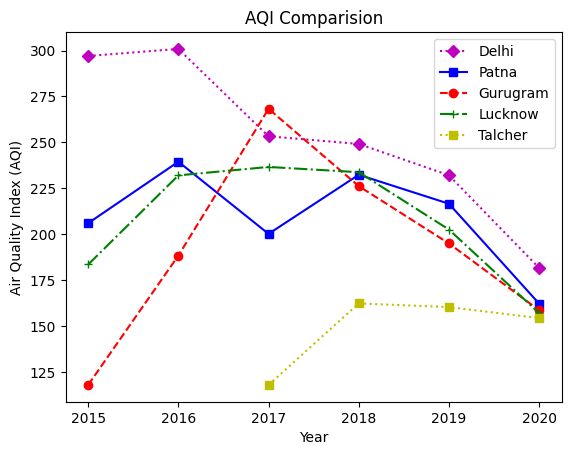

In [ ]:
plt.plot(delhi_df1_yr.index,delhi_df1_yr.AQI,'D:m')
plt.plot(patna_df1_yr.index,patna_df1_yr.AQI,'s-b')
plt.plot(gurugram_df1_yr.index,gurugram_df1_yr.AQI,'o--r')
plt.plot(lucknow_df1_yr.index,lucknow_df1_yr.AQI,'+-.g')
plt.plot(talcher_df1_yr.index,talcher_df1_yr.AQI,'s:y')

plt.xlabel('Year')
plt.ylabel('Air Quality Index (AQI)')

plt.title('AQI Comparision')
plt.legend(['Delhi','Patna','Gurugram','Lucknow','Talcher']);

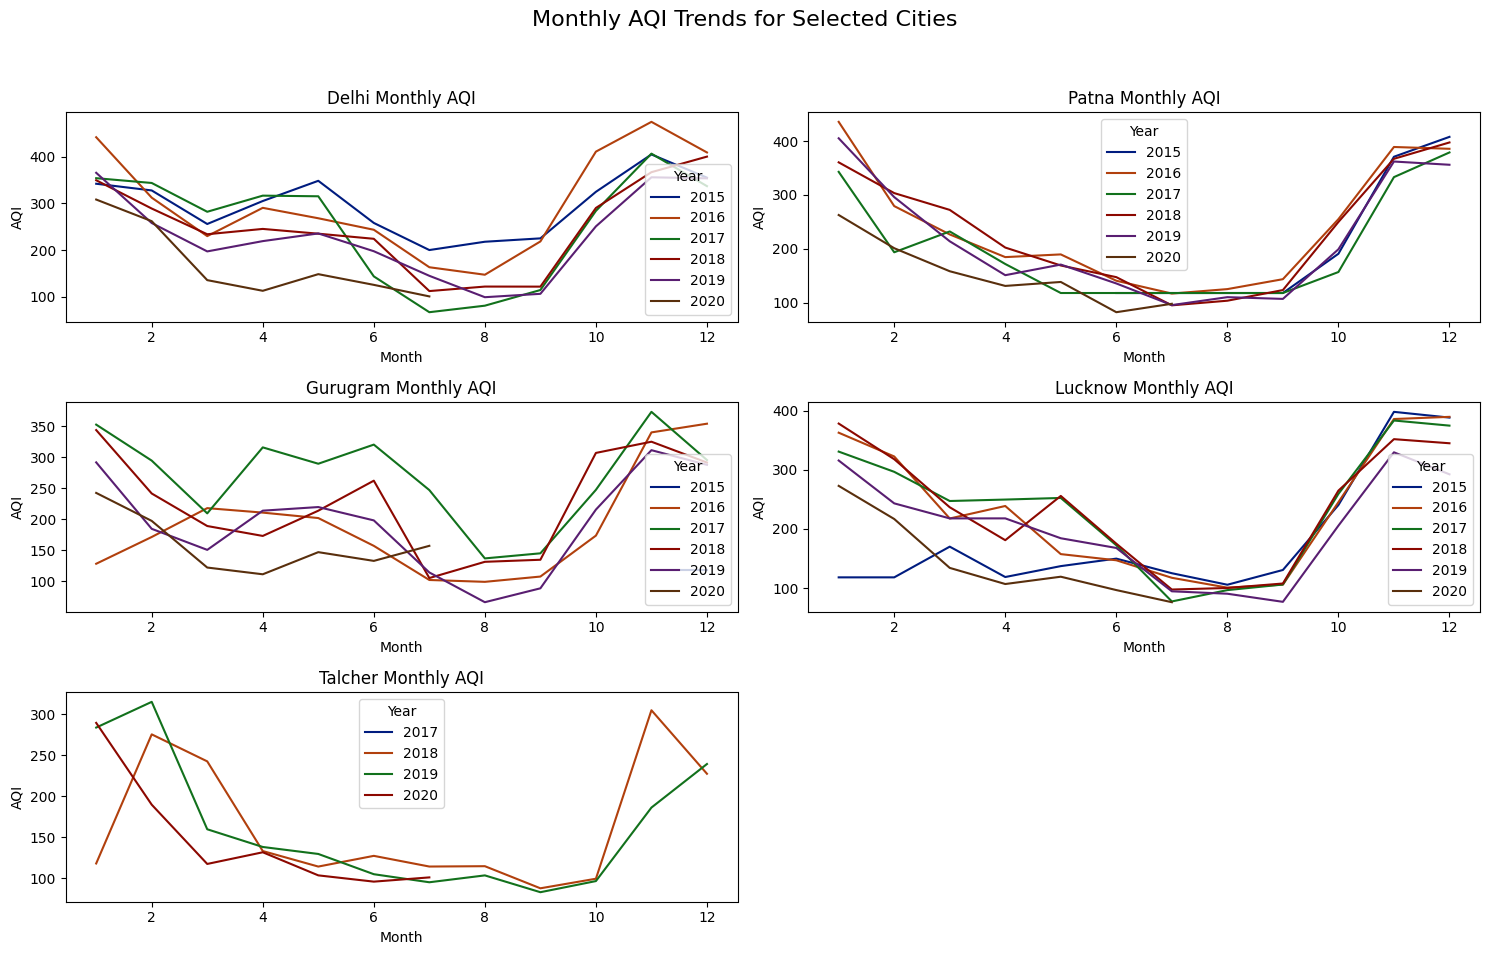

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cities you're interested in
cities_ = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Create a figure with 5 subplots (one for each city)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing
fig.suptitle('Monthly AQI Trends for Selected Cities', fontsize=16)

for i, city in enumerate(cities_):
    city_df = df1[df1['City'] == city]

    # Group by 'Year' and 'month' and calculate the mean for AQI
    city_monthly_avg = city_df.groupby(['Year', 'month'])['AQI'].mean().reset_index()

    # Plotting the AQI trend for each city
    sns.lineplot(
        data=city_monthly_avg,
        x='month', y='AQI', hue='Year', palette='dark',
        markers=True, dashes=False, ax=axes[i]
    )
    axes[i].set_title(f'{city} Monthly AQI')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('AQI')

# Hide the last subplot if not used
if len(cities_) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout to make room for the titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [ ]:
aqi_df=df1[['AQI','AQI_Bucket']]
aqi_df

,AQI,AQI_Bucket
Date,,
2015-01-01,118.0,moderate
2015-01-02,118.0,moderate
2015-01-03,118.0,moderate
2015-01-04,118.0,moderate
2015-01-05,118.0,moderate
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [ ]:
aqi_df.dropna()

,AQI,AQI_Bucket
Date,,
2015-01-01,118.0,moderate
2015-01-02,118.0,moderate
2015-01-03,118.0,moderate
2015-01-04,118.0,moderate
2015-01-05,118.0,moderate
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [ ]:
idx=['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']
aqi_bucket_df=aqi_df.AQI_Bucket.value_counts().to_frame().reindex(idx)
aqi_bucket_df.reset_index(inplace=True)
aqi_bucket_df.columns=['AQI_Bucket','Count']
aqi_bucket_df

,AQI_Bucket,Count
0,Good,1341
1,Satisfactory,8224
2,Moderate,8829
3,Poor,2781
4,Very Poor,2337
5,Severe,1338


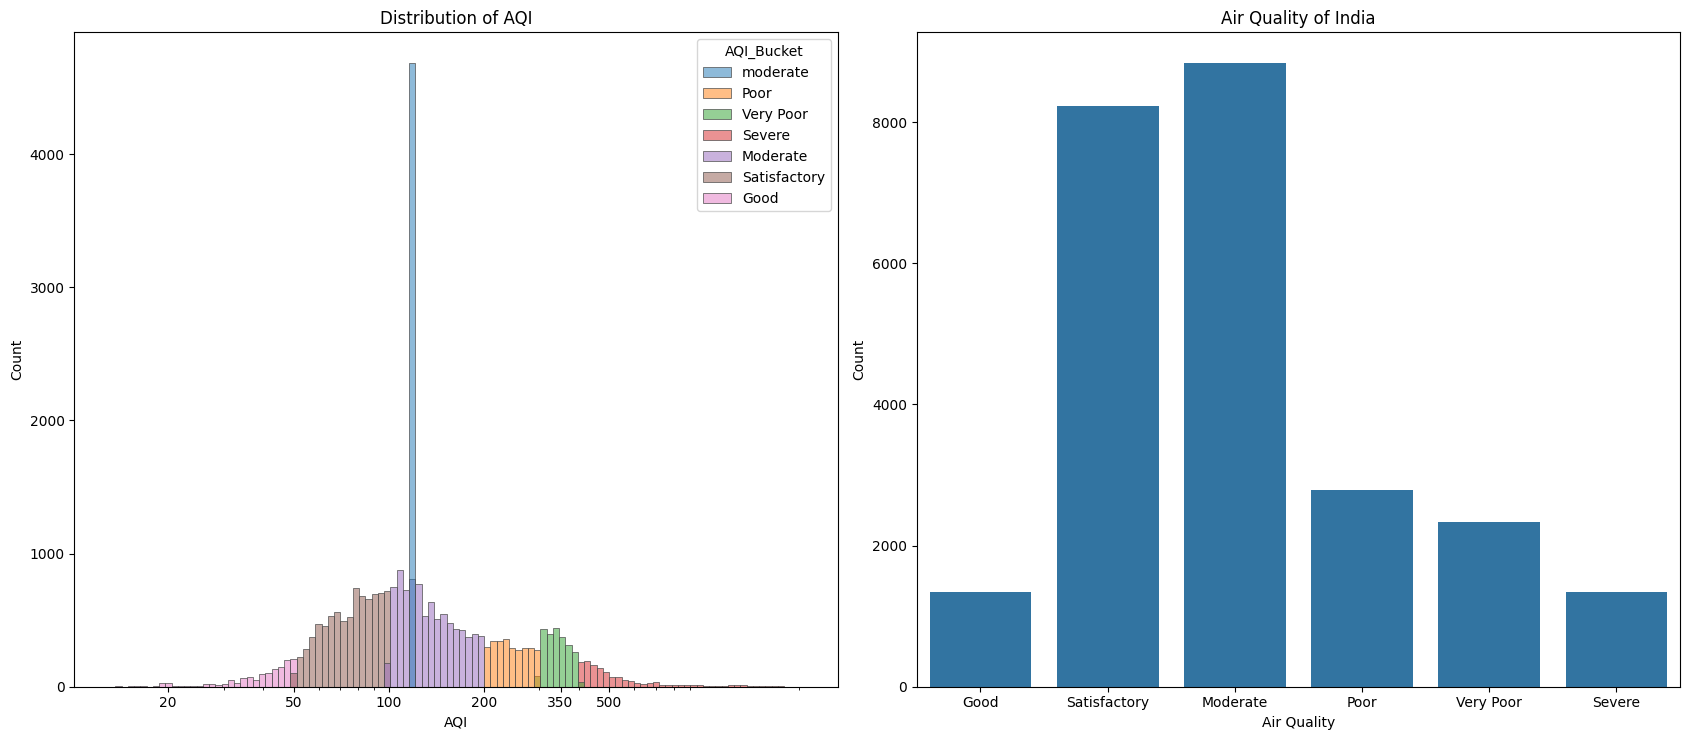

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Example DataFrame; replace with your actual DataFrames
# aqi_df is your DataFrame with 'AQI' and 'AQI_Bucket' columns
# aqi_bucket_df is your DataFrame with 'AQI_Bucket' and 'Count' columns

fig, ax = plt.subplots(1, 2, figsize=(17, 7.5), squeeze=False)

# Drawing the histogram for AQI values
sns.histplot(aqi_df, x='AQI', hue='AQI_Bucket', edgecolor=".3", linewidth=.5, log_scale=True, ax=ax[0,0])
ax[0,0].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0,0].set_xticks([20,50,100,200,350,500])
ax[0,0].set_title("Distribution of AQI")

# Drawing the bar chart for AQI_Bucket values
sns.barplot(x='AQI_Bucket', y='Count', data=aqi_bucket_df, ax=ax[0,1])
ax[0,1].set_title('Air Quality of India')
ax[0,1].set_ylabel('Count')
ax[0,1].set_xlabel('Air Quality')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and contains the required columns

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average level of each pollutant for each city
city_pollutants_df = df1.groupby('City')[pollutants].mean().reset_index()

# Melt the DataFrame to get it into long format suitable for plotting
city_pollutants_melted = city_pollutants_df.melt(id_vars='City', var_name='Pollutant', value_name='Level')

# List of cities to plot
cities = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Filter the melted DataFrame to include only the cities of interest
city_pollutants_melted = city_pollutants_melted[city_pollutants_melted['City'].isin(cities)]


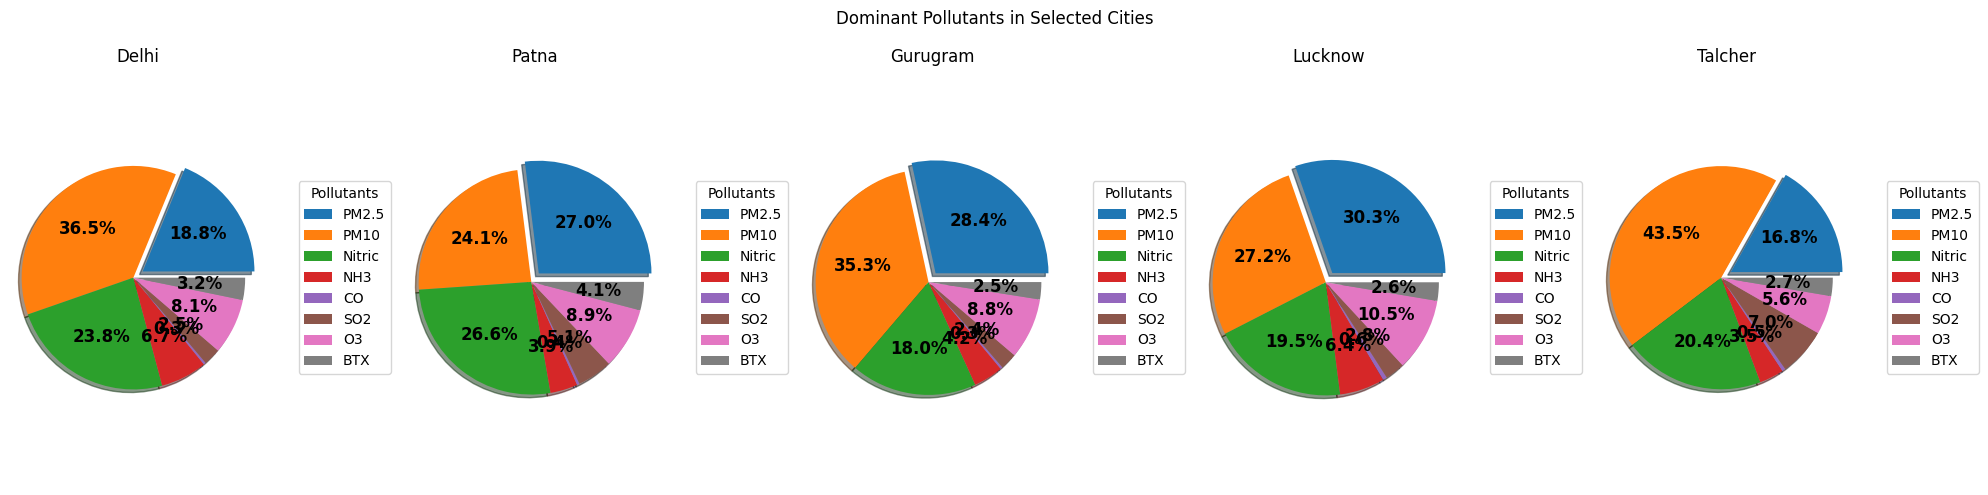

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each city
fig, axes = plt.subplots(1, len(cities), figsize=(20, 5), squeeze=False)
fig.suptitle('Dominant Pollutants in Selected Cities')

for i, city in enumerate(cities):
    # Filter the DataFrame for the current city
    city_data = city_pollutants_melted[city_pollutants_melted['City'] == city]

    # Ensure the DataFrame is not empty
    if city_data.empty:
        continue

    # Pie chart parameters
    labels = city_data['Pollutant']
    levels = city_data['Level']
    explode = [0.1] + [0] * (len(labels) - 1)  # Explode the first slice (most dominant pollutant)

    # Plotting the pie chart
    wedges, texts, autotexts = axes[0, i].pie(
        levels,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=0
    )

    # Setting title and properties
    axes[0, i].set_title(f'{city}')
    axes[0, i].axis('equal')  # Ensures the pie chart is drawn as a circle

    # Adding legend
    axes[0, i].legend(
        wedges,
        labels,
        title="Pollutants",
        loc="center left",
        bbox_to_anchor=(1.1, 0, 0.5, 1)
    )

    # Setting the properties of the percentage texts
    plt.setp(autotexts, size=12, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to make room for the suptitle

# Display the plot
plt.show()


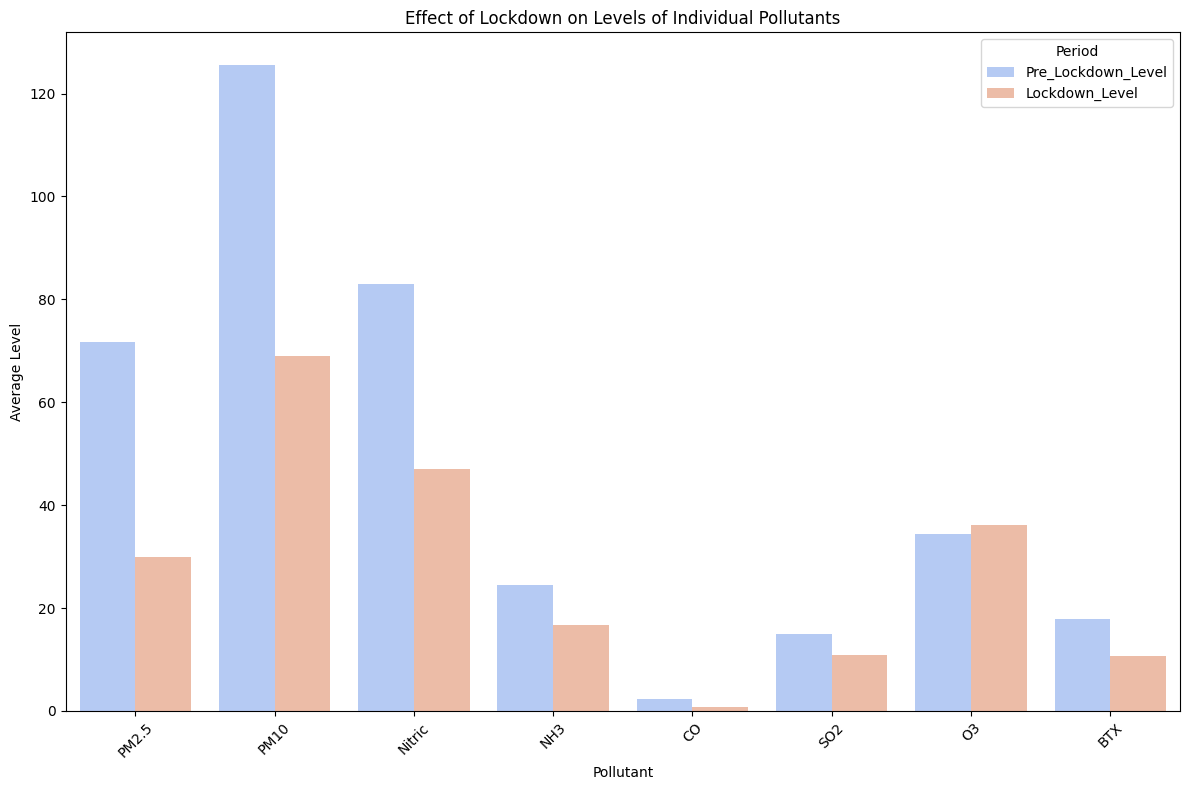

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define lockdown period (you may need to adjust these dates based on your specific lockdown dates)
lockdown_start = '2020-03-25'  # Example lockdown start date
lockdown_end = '2020-05-31'    # Example lockdown end date

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for lockdown period
lockdown_data = df[(df['Date'] >= lockdown_start) & (df['Date'] <= lockdown_end)]

# Filter data for pre-lockdown period
pre_lockdown_data = df[df['Date'] < lockdown_start]

# Define pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate average levels of each pollutant during lockdown
lockdown_avg = lockdown_data[pollutants].mean().reset_index()
lockdown_avg.columns = ['Pollutant', 'Lockdown_Level']

# Calculate average levels of each pollutant before lockdown
pre_lockdown_avg = pre_lockdown_data[pollutants].mean().reset_index()
pre_lockdown_avg.columns = ['Pollutant', 'Pre_Lockdown_Level']

# Merge the two DataFrames
comparison_df = pd.merge(pre_lockdown_avg, lockdown_avg, on='Pollutant')

# Plot the comparison
plt.figure(figsize=(12, 8))

# Melt the DataFrame for easier plotting with seaborn
melted_df = comparison_df.melt(id_vars='Pollutant', var_name='Period', value_name='Level')

# Plot
sns.barplot(x='Pollutant', y='Level', hue='Period', data=melted_df, palette='coolwarm')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Effect of Lockdown on Levels of Individual Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Average Level')
plt.legend(title='Period')
plt.tight_layout()

plt.show()
